In [1]:
import numpy as np
import pandas as pd
from random import shuffle
import matplotlib.pyplot as plt
import math
from statistics import mean

In [2]:
f = open("berlin52.tsp","r")

In [3]:
# avoiding first six line
for i in range(6):
    f.readline()
city_str = []
for i in range(52):
    line = f.readline()
    # avoiding new line at the end of ecah line
    line.strip()
    city_str.append(line.split())

In [4]:
#converting string list into numeric list
city = [[int(city_str[i][0]), float(city_str[i][1]), float(city_str[i][2])] for i in range(52)]

In [20]:
def fitness(sample):
    distance = 0.0
    for i in range(51):
        a = sample[i]
        b = sample[i+1]
        #print(a ,b)
        distance += math.sqrt( (city[a-1][1] - city[b-1][1])**2 + (city[a-1][2] - city[b-1][2])**2)
    return 100000-distance
        
#print(fitness(population[0])  )      
#print(fitness(population[1])  )  

In [6]:
def operation(parent1,parent2,low,high):
    child=[None]*52
    
    for i in range(low,high):
        child[i]=parent1[i]
    
    index = high
    for _ in range(high-low):
        for i in parent2[high:]:
            if i not in child:
                index = index%52
                child[index]=i
                index +=1
        for i in parent2[:high]:
            if i not in child:
                index = index%52
                child[index]=i
                index +=1
    return child

def order_crossover(parent1, parent2):
    position1 = np.random.randint(1, 50)
    position2 = np.random.randint(1, 50)
    
    #print(position1,position2)
    if position1 == position2:
        return parent1, parent2
    
    high = max(position1,position2)
    low = position1+position2 - high
    #print(low,high)
    child1 = operation(parent1,parent2,low,high)
    
    child2 = operation(parent2,parent1,low,high)
    
    return np.asarray(child1),np.asarray(child2)


#c1,c2 = order_crossover(population[0],population[1])
#print(fitness(population[0])) 
#print(fitness(population[1]))
#print(fitness(c1))
#print(fitness(c2))

In [7]:
def swap_mutaion(parent):
   
    position1 = np.random.randint(0, 51)
    position2 = np.random.randint(0, 51)
    #print(position1, position2)
    
    child = parent.copy()
    temp = child[position1]
    child[position1] = child[position2]
    child[position2] = temp;
    #print(fitness(child))
    return child

#p = swap_mutaion(population[0])
#print(p,end='\n\n')
#print(fitness(population[0]),end='\n\n')
#print(fitness(p),end='\n\n')

In [8]:
def tournament(pop,tournament_size):
    print(type(pop))
    one_d_pop = [i[0] for i in pop]
    tournament_individuals = np.random.choice(one_d_pop, tournament_size, False)
    print(tournament_individuals)
    print("\n\n")
    tournament_individuals = fitness()
    tournament_individuals = sorted(tournament_individuals, key=lambda ind: ind[1])
    print(tournament_individuals)
    return tournament_individuals[0],tournament_individuals[1]


In [9]:
def parent_selection(population):
    p1 = np.random.randint(low=0, high=len(population)-1)
    p2 = np.random.randint(low=0, high=len(population)-1)
    return population[p1], population[p2]

In [28]:
population_size = 400
num_generation = 500
#np.random.seed(0)
#-----
population = []
for _ in range(population_size):
    pop_indivdual = np.random.permutation(np.arange(1,53))
    pop_indivdual_fitness = fitness(pop_indivdual)
    population.append([pop_indivdual,pop_indivdual_fitness])

#for i in range(population_size):
    #print(population[i][1])

max_fitness=[]
avg_fitness=[]
for i in range(num_generation):
    child_pop=[]
    for _ in range(population_size):
        #parent selection
        p1, p2 = parent_selection(population)
        #
        p1 = np.asarray(p1[0])
        p2 = np.asarray(p2[0])
        #crossover
        child1, child2 = order_crossover(p1,p2)
        #mutaion
        #child1 = swap_mutaion(child1)
        #child2 = swap_mutaion(child2)
        child_fitness = fitness(child1)
        child_pop.append([child1,child_fitness])
        child_fitness = fitness(child2)
        child_pop.append([child2,child_fitness])

    # replacement of population
    sorted_pop = sorted(population, key=lambda fit: fit[1], reverse=True)
    sorted_child_pop = sorted(child_pop, key=lambda ind: ind[1],reverse=True)
    sorted_pop[-1] = sorted_child_pop[0]
    population = sorted_pop.copy()
    max_fitness.append(max(sorted_pop[i][1] for i in range(population_size)))
    avg_fitness.append(mean(sorted_pop[i][1] for i in range(population_size)))
    

print(type(max_fitness))
print(avg_fitness)

<class 'list'>
[70707.48609673863, 70729.11889023233, 70751.01992625468, 70772.36493338112, 70794.35408577164, 70816.69266085127, 70837.56945160656, 70859.28931651534, 70880.38779975775, 70903.98517075113, 70927.07909804452, 70947.25717527299, 70970.20745869652, 70994.7847364593, 71017.66742897482, 71043.22726523197, 71067.55802359265, 71089.08247198451, 71113.02222138368, 71135.40456613454, 71159.31839335735, 71181.68843461607, 71204.80877684588, 71228.27917051558, 71250.32429226005, 71277.58485873957, 71302.99385879244, 71326.0195869123, 71350.87922957305, 71376.07561997586, 71400.67546463884, 71426.26552474387, 71449.36124753134, 71474.35288288818, 71496.82799306347, 71521.93991502495, 71546.20112972913, 71569.62571031792, 71593.60110909062, 71618.26925117482, 71643.53942450626, 71669.52140062938, 71695.78643772776, 71722.10335400628, 71746.98821525031, 71773.41287235898, 71800.97248083753, 71824.40706003261, 71850.14920994252, 71878.59696842416, 71905.37939575319, 71930.91851704745

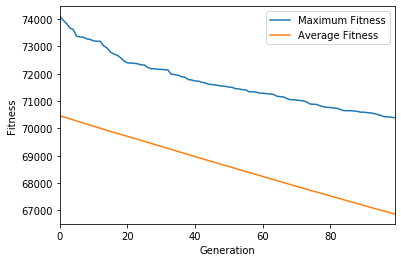

In [22]:
df = pd.DataFrame({
    "Maximum Fitness":max_fitness ,
    "Average Fitness":avg_fitness 
})
ax = df.plot()
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness');

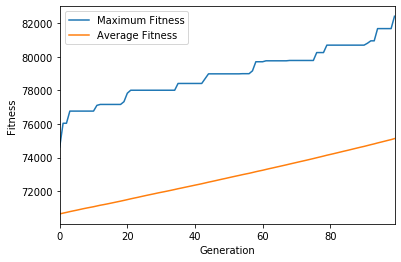

In [24]:
df = pd.DataFrame({
    "Maximum Fitness":max_fitness ,
    "Average Fitness":avg_fitness 
})
ax = df.plot()
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness');

Text(0, 0.5, 'Fitness')

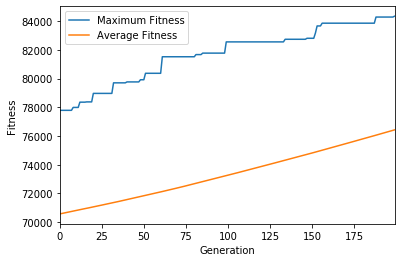

In [27]:
df = pd.DataFrame({
    "Maximum Fitness":max_fitness ,
    "Average Fitness":avg_fitness 
})
ax = df.plot()
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')

Text(0, 0.5, 'Fitness')

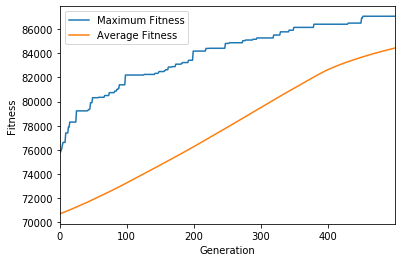

In [29]:
df = pd.DataFrame({
    "Maximum Fitness":max_fitness ,
    "Average Fitness":avg_fitness 
})
ax = df.plot()
ax.set_xlabel('Generation')
ax.set_ylabel('Fitness')

In [ ]:
#population=[]

#for _ in num_generation:
pop=[]

#evaluate population
for i in range(pop_size):
    pop_fitness = fitness(population[i])
    pop.append([population[i],pop_fitness])
pop = np.asarray(pop)
print(type(pop))